###1 Importing dependencies

In [73]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#### 2 Uploading the data into notebook

In [74]:
data=pd.read_csv('Downloads/Month_Value_1 (1).csv')
data

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,2022-08,NaN,NaN,NaN,NaN
92,2022-09,NaN,NaN,NaN,NaN
93,2022-10,NaN,NaN,NaN,NaN
94,2022-11,NaN,NaN,NaN,NaN


In [75]:
data.shape

(96, 5)

In [76]:
data.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [77]:
data.size

480

In [78]:
data.dtypes

Period                                       object
Revenue                                     float64
Sales_quantity                              float64
Average_cost                                float64
The_average_annual_payroll_of_the_region    float64
dtype: object

###3 Data Exploration

In [79]:
# Cek missing value dari masing masing kolom
print(data.isnull().sum())

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64


In [80]:
# dropna akan membuang baris yang didalamnya ada missing value
data.dropna()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,2019-12,5.875647e+07,38069.0,1543.420464,29878525.0
60,2020-01,5.628830e+07,27184.0,2070.640850,29044998.0
61,2020-02,4.022524e+07,23509.0,1711.057181,29044998.0
62,2020-03,5.002217e+07,32569.0,1535.882748,29044998.0


In [81]:
df = data.dropna()
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,2019-12,5.875647e+07,38069.0,1543.420464,29878525.0
60,2020-01,5.628830e+07,27184.0,2070.640850,29044998.0
61,2020-02,4.022524e+07,23509.0,1711.057181,29044998.0
62,2020-03,5.002217e+07,32569.0,1535.882748,29044998.0


In [82]:
df=df[['Period','Sales_quantity']]
df=df.reset_index(drop=True)
df.head()

,Period,Sales_quantity
0,2015-01,12729.0
1,2015-02,11636.0
2,2015-03,15922.0
3,2015-04,15227.0
4,2015-05,8620.0


In [83]:
df['Period']=pd.to_datetime(df['Period'], infer_datetime_format=True)
df=df.set_index(['Period'])


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2015-01-01 to 2020-01-04
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sales_quantity  64 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [85]:
df.loc[df['Sales_quantity']==min(df['Sales_quantity'])]

,Sales_quantity
Period,
2016-08-01,8314.0


In [86]:
df.loc[df['Sales_quantity']==max(df['Sales_quantity'])]

,Sales_quantity
Period,
2019-12-01,38069.0


In [87]:
df.shape

(64, 1)

In [88]:
df.columns

Index(['Sales_quantity'], dtype='object')

In [89]:
df.describe()

,Sales_quantity
count,64.000000
mean,19197.375000
std,6591.287257
min,8314.000000
25%,15065.500000
50%,18368.000000
75%,22856.250000
max,38069.000000


####4 Data Analysis

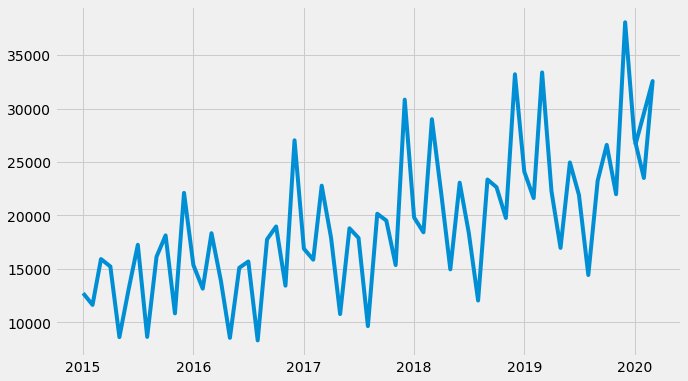

In [90]:
plt.plot(df.Sales_quantity)
figsize=(20,20)

Dari data tersebut dapat diketahui bahwa pola data ialah musiman dan memiliki trend naik.


**> Stationarity Check-Rolling Statistic Test**



In [91]:
rolmean=df.rolling(window=12).mean()
print(rolmean.head(15))

            Sales_quantity
Period                    
2015-01-01             NaN
2015-02-01             NaN
2015-03-01             NaN
2015-04-01             NaN
2015-05-01             NaN
2015-06-01             NaN
2015-07-01             NaN
2015-08-01             NaN
2015-09-01             NaN
2015-10-01             NaN
2015-11-01             NaN
2015-12-01    14201.916667
2016-01-01    14421.583333
2016-02-01    14548.000000
2016-03-01    14749.416667


In [92]:
rolstd=df.rolling(window=12).std()
print(rolstd.head(15))

            Sales_quantity
Period                    
2015-01-01             NaN
2015-02-01             NaN
2015-03-01             NaN
2015-04-01             NaN
2015-05-01             NaN
2015-06-01             NaN
2015-07-01             NaN
2015-08-01             NaN
2015-09-01             NaN
2015-10-01             NaN
2015-11-01             NaN
2015-12-01     4026.683690
2016-01-01     4010.896918
2016-02-01     3938.369413
2016-03-01     4074.480122


disini kita melakukan rolling terhadap rata-rata dan standar deviasi untuk mengecek apakah series ini stasioner atau tidak

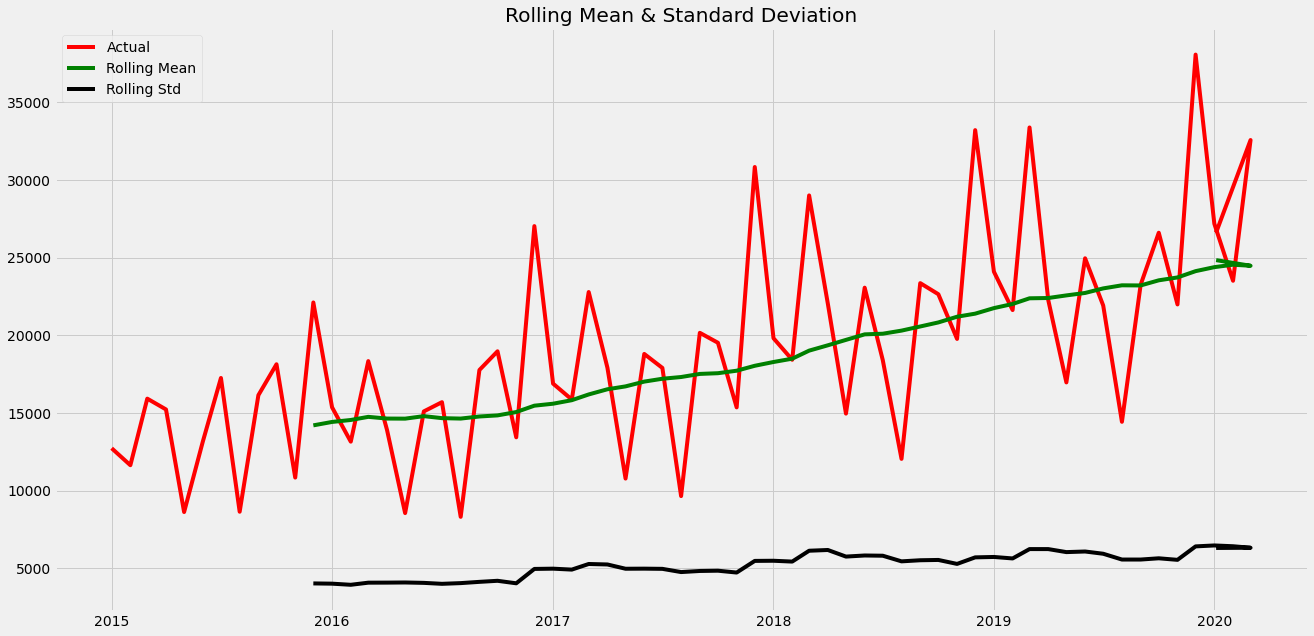

In [93]:
plt.figure(figsize=(20,10))
actual=plt.plot(df, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

pada grafik diatas kita melihat bahwa data actual dan rolling (mean dan std) cukup berbeda dimana grafik cenderung meningkat terhadap waktu, menandakan bahwa series ini tidak stasioner

**> Stationarity Check - Augmented Dickey-Fuller (ADF) test**



HO= Data Tidak Stasioner
H1= Data Stasioner

p-value< 0,05 (alpha) dan nilai ADF< critical value maka tolak HO, artinya time series stasioner

In [94]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(df['Sales_quantity'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.157056
p-value                  0.995675
Lags Used               11.000000
No. of Obs              52.000000
Critical Value (1%)     -3.562879
Critical Value (5%)     -2.918973
Critical Value (10%)    -2.597393
dtype: float64


>Nilai ADF statistic yang lebih besar dari critical values pada semua level, dan juga p-value yang lebih besar dari 0.05 turut menandakan, kita gagal menolak null hypothesis pada 90%, 95%, and 99% confidence, yang berarti bahwa data time series ini strongly non-stationary. 

*   Berdasarkan insights di atas, maka kita
akan mencoba menstabilkan variance dengan cara log data dengan np.log()

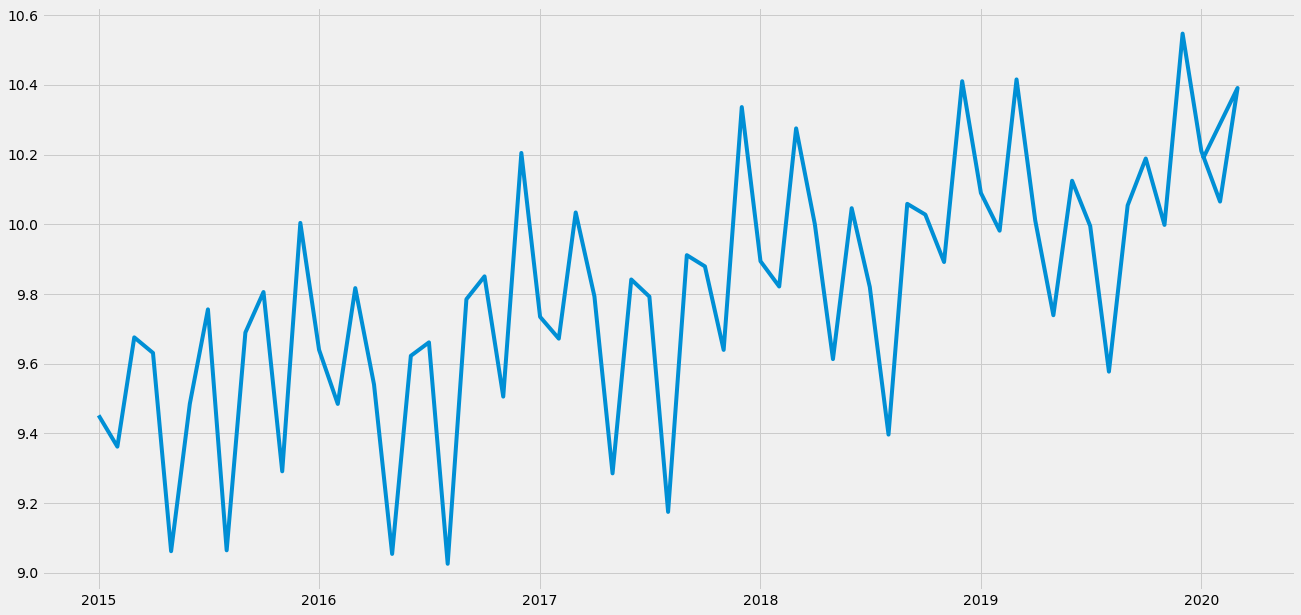

In [95]:
# Plot dalam bentuk visualisasi line chart dengan menggunakan function numpy np.log
plt.figure(figsize=(20,10))
data_log=np.log(df)
plt.plot(data_log)

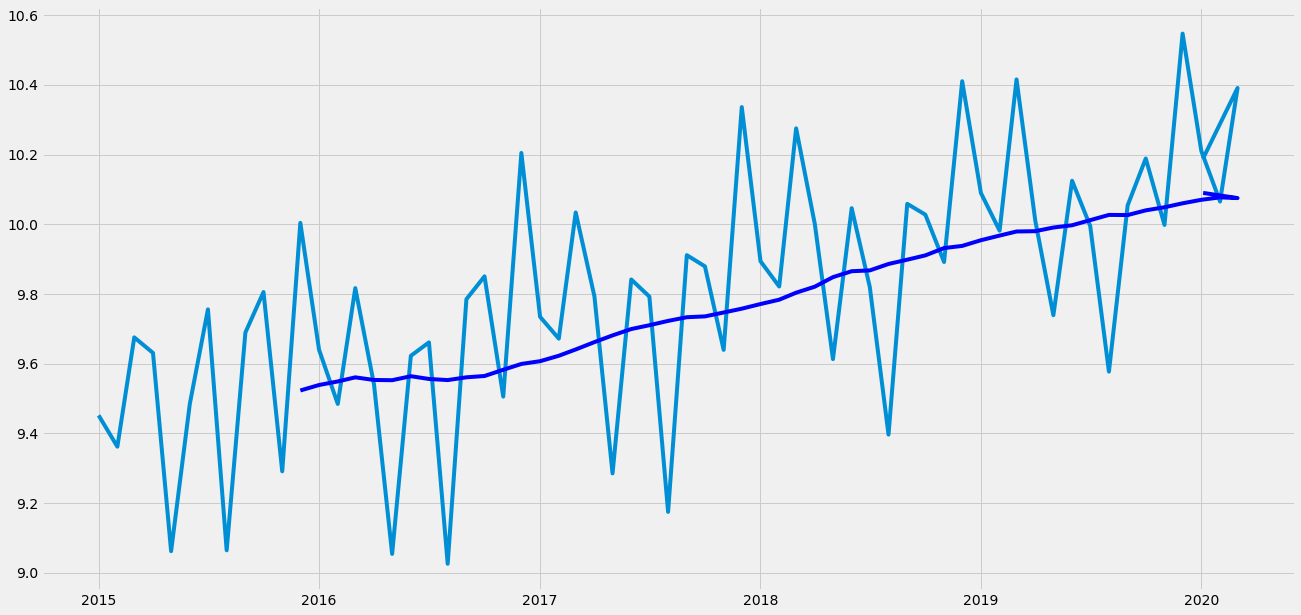

In [96]:
# Cek secara visual kembali dengan plot data_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(20,10))

MAvg=data_log.rolling(window=12).mean() #disini kita melakukan rolling mean untuk melihat secara visual apakah series ini stationary atau tidak
MStd=data_log.rolling(window=12).std()

plt.plot(data_log)
plt.plot(MAvg, color='blue') #nilai rolling mean
#plt.plot(MStd, color='red') #nilai rolling std

In [97]:
# Hitung difference dari data_log dengan MAvg
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Sales_quantity
Period,
2015-01-01,NaN
2015-02-01,NaN
2015-03-01,NaN
2015-04-01,NaN
2015-05-01,NaN
2015-06-01,NaN
2015-07-01,NaN
2015-08-01,NaN
2015-09-01,NaN


In [98]:
# Melakukan dropna untuk menghilang missing value
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Sales_quantity
Period,
2015-12-01,0.480866
2016-01-01,0.101108
2016-02-01,-0.064546
2016-03-01,0.256057
2016-04-01,-0.012893


In [99]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller
def stationarity(timeseries):
    from statsmodels.tsa.stattools import adfuller
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Sales_quantity'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

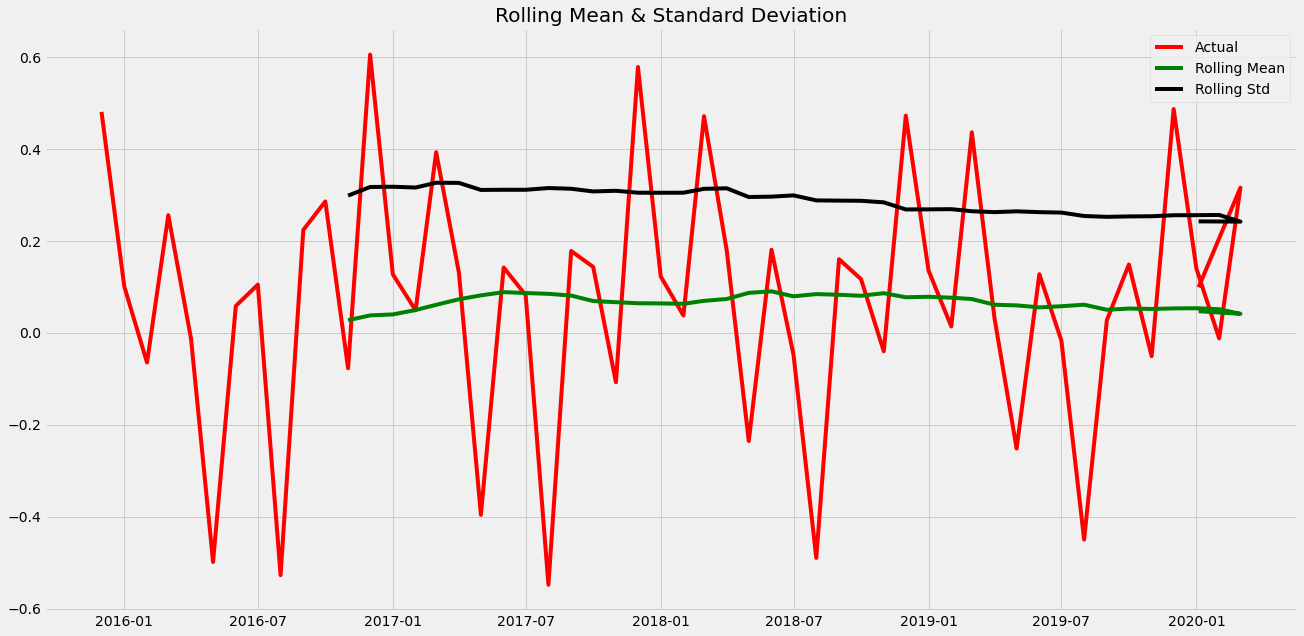

Dickey-Fuller Test: 
Test Statistic          -1.984851
p-value                  0.293255
Lags Used               11.000000
No. of Obs              41.000000
Critical Value (1%)     -3.600983
Critical Value (5%)     -2.935135
Critical Value (10%)    -2.605963
dtype: float64


In [100]:
stationarity(data_log_diff)

Dalam Dickey-Fuller test didapatkan :

*   t-value (-1.984851) > DF critical value 1% (-3.600983), DF critical value 5% (-2.935135, DF critical value 10% (-2.605963)
*   p-value (0.293255) > 0.05

Hal ini menunjukkan bahwa kita gagal menolak H0 (accept H0) artinya series ini tidak stasioner.

Kita dapat mencoba lagi dengan menggunakan Exponentially Weighted Moving Average (function ewm), karena melalui EWM memberikan lebih banyak bobot kepada observasi terbaru sehingga dapat menangkap tren terkini secara lebih cepat

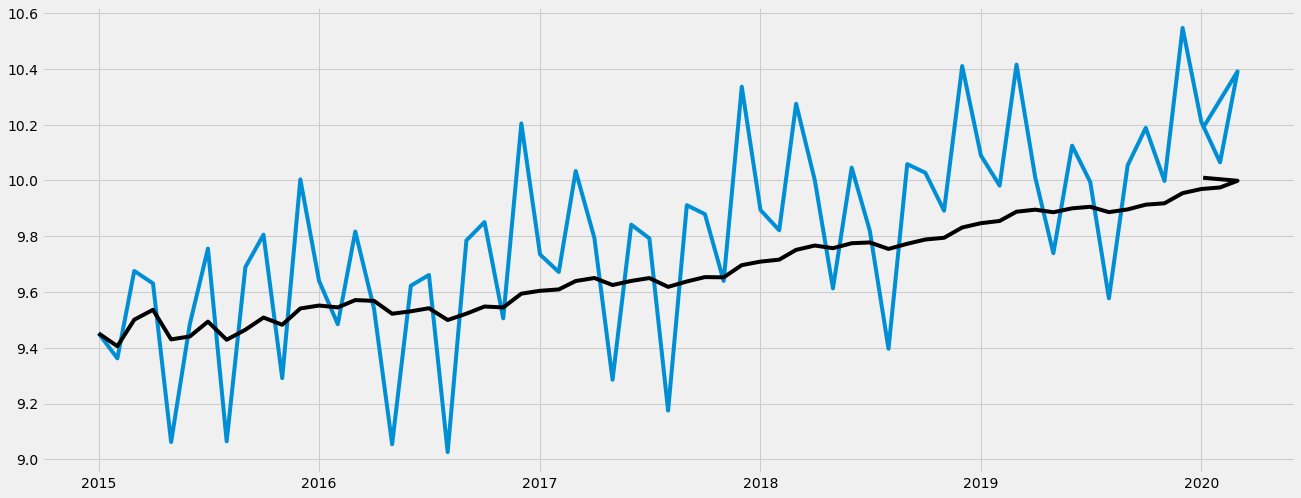

In [101]:
plt.figure(figsize=(20,8))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 
plt.plot(data_log)
plt.plot(exp_data, color='black')

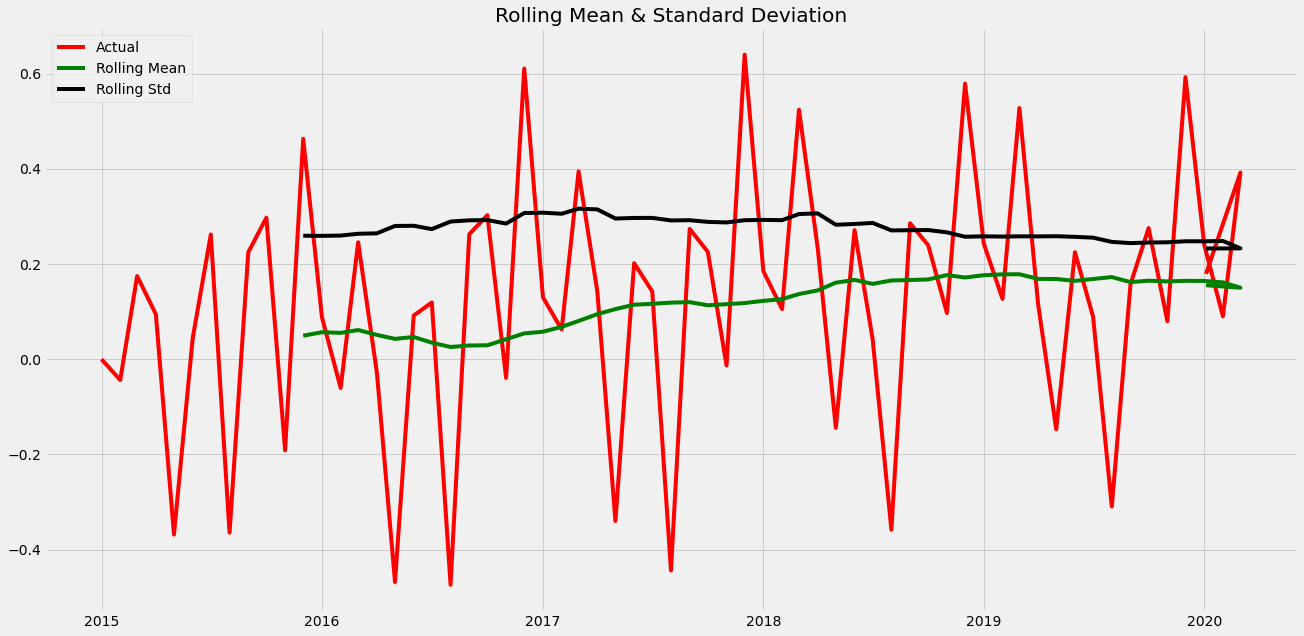

Dickey-Fuller Test: 
Test Statistic          -0.944546
p-value                  0.772949
Lags Used               11.000000
No. of Obs              52.000000
Critical Value (1%)     -3.562879
Critical Value (5%)     -2.918973
Critical Value (10%)    -2.597393
dtype: float64


In [102]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

Dalam Dickey-Fuller test ini didapatkan : 

*   t-value (-0.944546) > DF critical value 1% (-3.562879), 5% (-2.918973), 10% (-2.597393)
*   p value (0.772949)> 0.05 

Maka kita gagal menolak HO, artinya data tidak stasioner

**> Stationarity Check - Shift test**



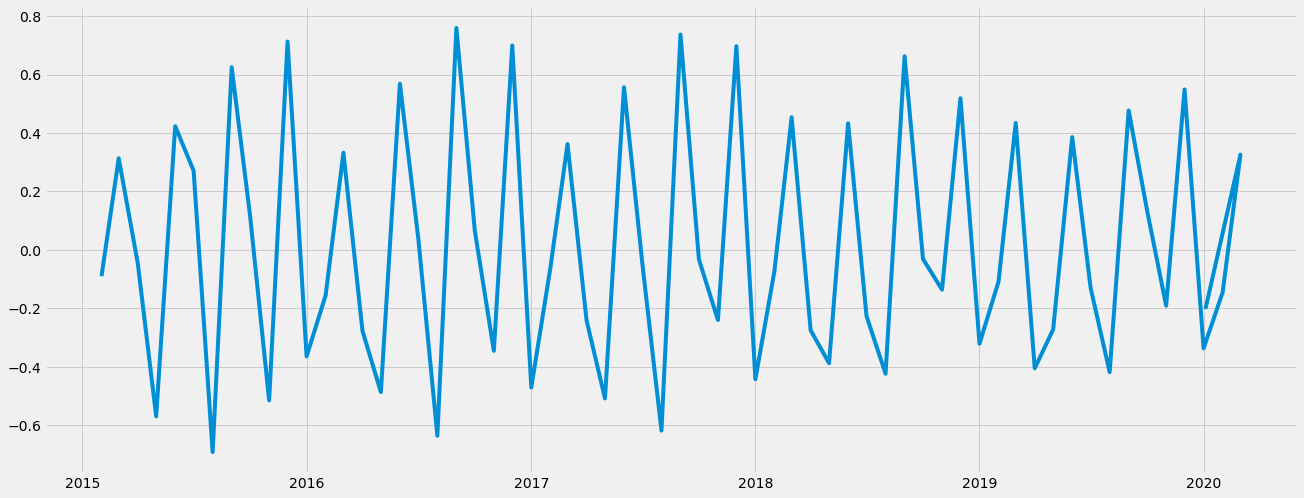

In [103]:
plt.figure(figsize=(20,8))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

In [104]:
# Check missing value
data_shift.isna().sum()

Sales_quantity    1
dtype: int64

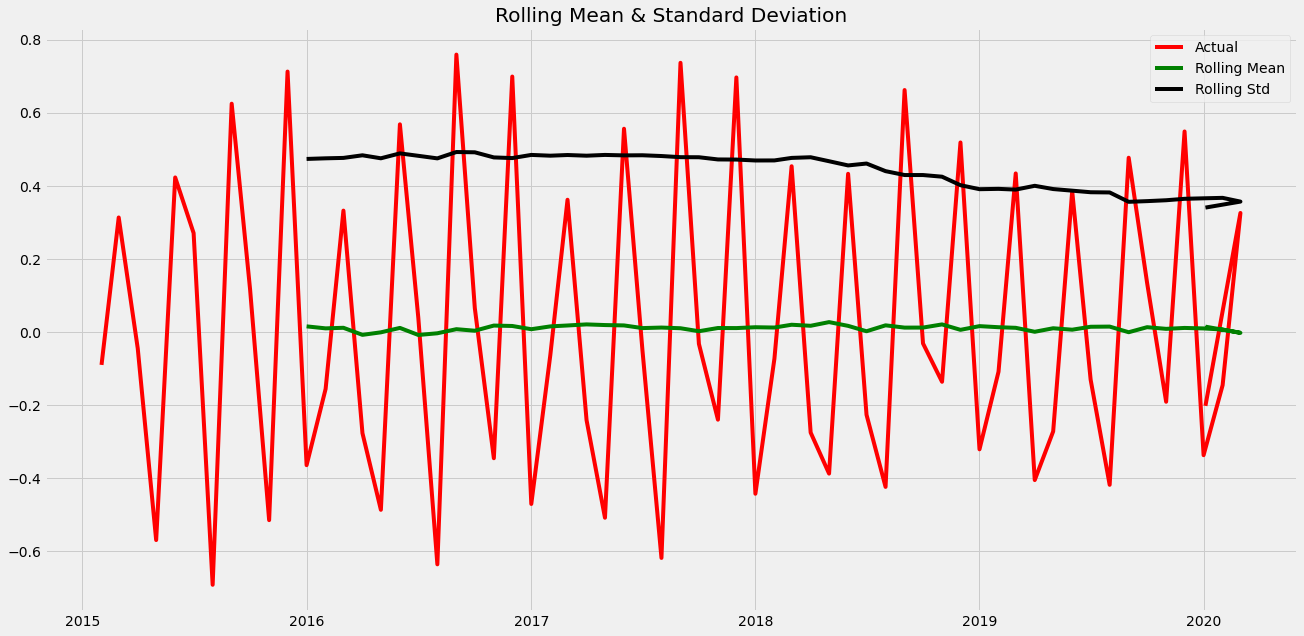

Dickey-Fuller Test: 
Test Statistic          -3.797344
p-value                  0.002935
Lags Used               11.000000
No. of Obs              51.000000
Critical Value (1%)     -3.565624
Critical Value (5%)     -2.920142
Critical Value (10%)    -2.598015
dtype: float64


In [105]:
data_shift=data_shift.dropna()
stationarity(data_shift)

Dari data shift diatas didapatkan:
 ADF test menunjukkan p-value < 0.05 

*   p-value (0.002935) < 0.05
*   t-test (-3.797.344) < critical value 1% (-3.565624), 5% (-2.920142), 10%(-2.598015)

Maka tolak HO yang mengindikasikan bahwa series ini stasioner

> **Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)**

*   ACF merupakan korelasi antar data di dalam time series tersebut yang dipisahkan dalam lag dimana (Xt , Xk+t) dengan k adalah jumlah lag dan t adalah nilainya. ACF merata-ratakan data berdasarkan berjalan berdasarkan waktu (Moving Average).
*   PACF juga menghitung korelasi antar data di time series. Perbedaannya, PACF juga menghitung korelasi antara Xt dan Xt+k namun sebelumnya menghilangkan data antara Xt dan Xt+k terlebih dahulu. Berarti data yang dihilangkan adalah data Xt+1 sampai dengan Xt+k-1 . PACF melihat data terhadap waktu sebelumnya (Auto Corelation) 



Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

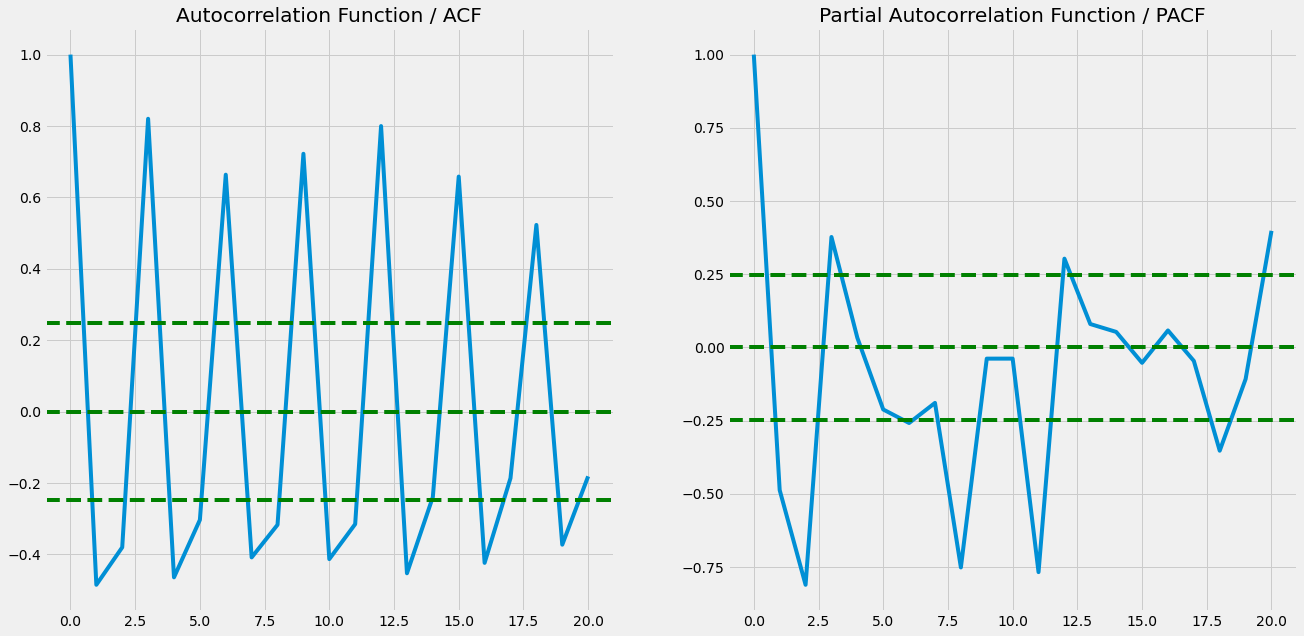

In [106]:
# dari module time series analysis, import function acf dan pacf
# ACF = Auto Correlation Function
# PACF = Partial Auto Correlation Function
from statsmodels.tsa.stattools import acf, pacf 

# terapkan function acf dan pcf pada data_shift yang sudah dibuat
lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

Dari grafik di atas terlihat bahwa grafik time series (berwarna biru )berpotongan dengan grafik shift time series (dlm hal ini dengan lag=20), 
sehingga dapat dikatakan bahwa grafik time series ini mengalami efek auto correlation

> Forecasting



Model Development

Pada Model Development terdapat 2 model time series yaitu
1. Holt Winters
2. SARIMAX (pada dasarnya ARIMA yang memang spesifik menghadapai seasonal effect)

DATA PREPARATION

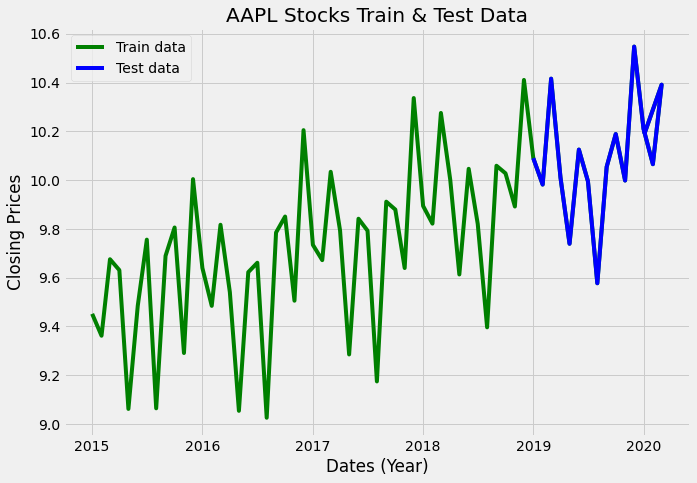

In [107]:
train_data, test_data = data_log[3:int(len(data_log)*0.75)], data_log[int(len(data_log)*0.75):]
plt.figure(figsize=(10,7))
plt.grid(True)
plt.title('AAPL Stocks Train & Test Data')
plt.xlabel('Dates (Year)')
plt.ylabel('Closing Prices')
plt.plot(data_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=104.411, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=92.155, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=102.457, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=10.206, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=5.886, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=6.773, Time=0.17 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=3.975, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=8.227, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=4.848, Time=0.06 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.902 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. O

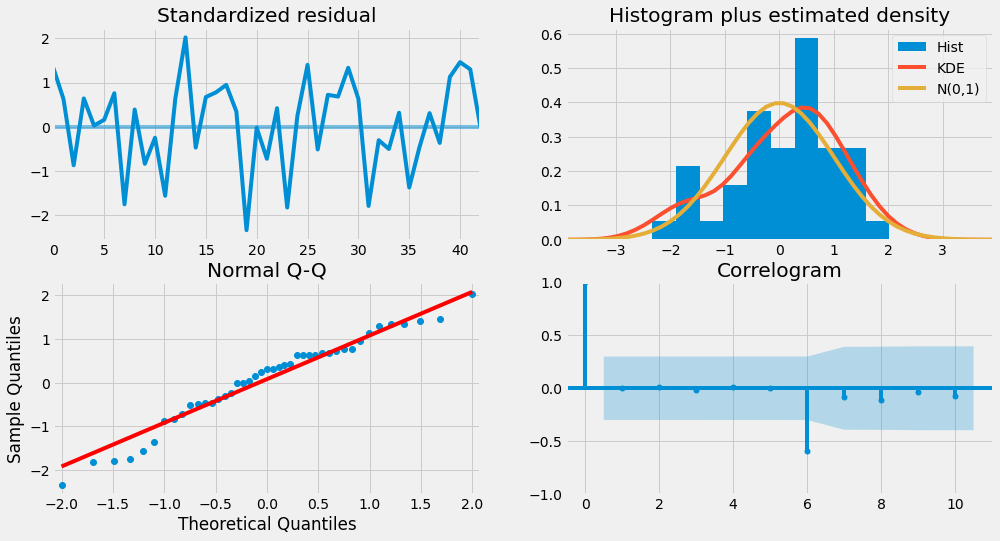

In [108]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [109]:
from statsmodels.tsa.arima.model import ARIMA

In [110]:
#Creating Data Model for forecasting
model = ARIMA(train_data, order=(3,2,0))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:         Sales_quantity   No. Observations:                   45
Model:                 ARIMA(3, 2, 0)   Log Likelihood                   2.013
Date:                Mon, 25 Apr 2022   AIC                              3.975
Time:                        17:08:13   BIC                             11.020
Sample:                    04-01-2015   HQIC                             6.573
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3990      0.198     -7.048      0.000      -1.788      -1.010
ar.L2         -1.3193      0.207     -6.369      0.000      -1.725      -0.913
ar.L3         -0.3738      0.206     -1.819      0.0

SETUP THE FORECAST

In [111]:
fc, se, conf = fitted.forecast(3, alpha=0.05)

VISUALISASI FORECAST